In [1]:
#Load dataset from Kaggle
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d mohammadasimbluemoon/aptos2019-diabetic-retinopathy-oversampled-256x256
!ls

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mohammadasimbluemoon/aptos2019-diabetic-retinopathy-oversampled-256x256
License(s): unknown
100% 459M/460M [00:24<00:00, 21.7MB/s]
100% 460M/460M [00:24<00:00, 19.5MB/s]
aptos2019-diabetic-retinopathy-oversampled-256x256.zip	kaggle.json  sample_data


# Preprocessing Data

In [2]:
!unzip /content/aptos2019-diabetic-retinopathy-oversampled-256x256.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/4/118.png          
  inflating: test/4/19.png           
  inflating: test/4/20.png           
  inflating: test/4/21.png           
  inflating: test/4/22.png           
  inflating: test/4/23.png           
  inflating: test/4/24.png           
  inflating: test/4/25.png           
  inflating: test/4/26.png           
  inflating: test/4/27.png           
  inflating: test/4/28.png           
  inflating: test/4/29.png           
  inflating: test/4/30.png           
  inflating: test/4/31.png           
  inflating: test/4/32.png           
  inflating: test/4/33.png           
  inflating: test/4/34.png           
  inflating: test/4/35.png           
  inflating: test/4/36.png           
  inflating: test/4/37.png           
  inflating: test/4/38.png           
  inflating: test/4/39.png           
  inflating: test/4/40.png           
  inflating: test/4/41.png           
  inflating: test/4/42.png           

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.efficientnet import preprocess_input
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [4]:
test=os.listdir('/content/test')
test0=os.listdir('/content/test/0')
test1=os.listdir('/content/test/1')
test2=os.listdir('/content/test/2')
test3=os.listdir('/content/test/3')
test4=os.listdir('/content/test/4')

print("Test Folder: ",len(test))
print("Test 0: ",len(test0))
print("Test 1: ",len(test1))
print("Test 2",len(test2))
print("Test 3",len(test3))
print("Test 4",len(test4))


Test Folder:  5
Test 0:  100
Test 1:  100
Test 2 100
Test 3 100
Test 4 100


In [5]:
train=os.listdir('/content/train')
train0=os.listdir('/content/train/0')
train1=os.listdir('/content/train/1')
train2=os.listdir('/content/train/2')
train3=os.listdir('/content/train/3')
train4=os.listdir('/content/train/4')

print("Train Folder: ",len(train))
print("Train 0: ",len(train0))
print("Train 1: ",len(train1))
print("Train 2",len(train2))
print("Train 3",len(train3))
print("Train 4",len(train4))

Train Folder:  5
Train 0:  1099
Train 1:  1000
Train 2 899
Train 3 930
Train 4 990


In [9]:
!mkdir img

In [10]:
!mkdir /content/img/NoDR
!mkdir /content/img/Mild
!mkdir /content/img/Moderate
!mkdir /content/img/Severe
!mkdir /content/img/ProliferativeDR

In [11]:
#train move
import shutil
import os

source_dir = '/content/train/0'
target_dir = '/content/img/NoDR'
source_dir1 = '/content/train/1'
target_dir1 = '/content/img/Mild'
source_dir2 = '/content/train/2'
target_dir2 = '/content/img/Moderate'
source_dir3 = '/content/train/3'
target_dir3 = '/content/img/Severe'
source_dir4 = '/content/train/4'
target_dir4 = '/content/img/ProliferativeDR'

file_names = os.listdir(source_dir)
file_names1 = os.listdir(source_dir1)
file_names2 = os.listdir(source_dir2)
file_names3 = os.listdir(source_dir3)
file_names4 = os.listdir(source_dir4)

for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

for file_names1 in file_names1:
    shutil.move(os.path.join(source_dir1, file_names1), target_dir1)

for file_names2 in file_names2:
    shutil.move(os.path.join(source_dir2, file_names2), target_dir2)

for file_names3 in file_names3:
    shutil.move(os.path.join(source_dir3, file_names3), target_dir3)

for file_names4 in file_names4:
    shutil.move(os.path.join(source_dir4, file_names4), target_dir4)

In [12]:
!mkdir new_img

In [13]:
!mkdir /content/new_img/NoDR
!mkdir /content/new_img/Mild
!mkdir /content/new_img/Moderate
!mkdir /content/new_img/Severe
!mkdir /content/new_img/ProliferativeDR

In [14]:
import os
import numpy as np
import shutil
import pandas as pd


def train_test_split():
    print("########### Train Test Val Script started ###########")
    #data_csv = pd.read_csv("DataSet_Final.csv") ##Use if you have classes saved in any .csv file

    root_dir = '/content/new_img'
    classes_dir = ['NoDR', 'Mild', 'Moderate', 'Severe','ProliferativeDR']


    processed_dir = '/content/img'

    val_ratio = 0.20
    test_ratio = 0.10

    for cls in classes_dir:
        # Creating partitions of the data after shuffeling
        print("$$$$$$$ Class Name " + cls + " $$$$$$$")
        src = processed_dir +"/" + cls  # Folder to copy images from

        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames) * (1 - (val_ratio + test_ratio))),
                                                                   int(len(allFileNames) * (1 - test_ratio)),
                                                                   ])

        train_FileNames = [src + '/' + name for name in train_FileNames.tolist()]
        val_FileNames = [src + '/' + name for name in val_FileNames.tolist()]
        test_FileNames = [src + '/' + name for name in test_FileNames.tolist()]

        print('Total images: '+ str(len(allFileNames)))
        print('Training: '+ str(len(train_FileNames)))
        print('Validation: '+  str(len(val_FileNames)))
        print('Testing: '+ str(len(test_FileNames)))

        # # Creating Train / Val / Test folders (One time use)
        os.makedirs(root_dir + '/train/' + cls)
        os.makedirs(root_dir + '/val/' + cls)
        os.makedirs(root_dir + '/test/' + cls)

        # Copy-pasting images
        for name in train_FileNames:
            shutil.copy(name, root_dir + '/train/' + cls)

        for name in val_FileNames:
            shutil.copy(name, root_dir + '/val/' + cls)

        for name in test_FileNames:
            shutil.copy(name, root_dir + '/test/' + cls)

    print("########### Train Test Val Script Ended ###########")

train_test_split()

########### Train Test Val Script started ###########
$$$$$$$ Class Name NoDR $$$$$$$
Total images: 1099
Training: 769
Validation: 220
Testing: 110
$$$$$$$ Class Name Mild $$$$$$$
Total images: 1000
Training: 700
Validation: 200
Testing: 100
$$$$$$$ Class Name Moderate $$$$$$$
Total images: 899
Training: 629
Validation: 180
Testing: 90
$$$$$$$ Class Name Severe $$$$$$$
Total images: 930
Training: 651
Validation: 186
Testing: 93
$$$$$$$ Class Name ProliferativeDR $$$$$$$
Total images: 990
Training: 693
Validation: 198
Testing: 99
########### Train Test Val Script Ended ###########


In [15]:
os.rename("/content/test/0","/content/test/NoDR")
os.rename("/content/test/1","/content/test/Mild")
os.rename("/content/test/2","/content/test/Moderate")
os.rename("/content/test/3","/content/test/Severe")
os.rename("/content/test/4","/content/test/ProliferativeDR")

os.rename("/content/train/0","/content/train/NoDR")
os.rename("/content/train/1","/content/train/Mild")
os.rename("/content/train/2","/content/train/Moderate")
os.rename("/content/train/3","/content/train/Severe")
os.rename("/content/train/4","/content/train/ProliferativeDR")


In [16]:
import shutil, os
shutil.rmtree(r'/content/train')
shutil.rmtree(r'/content/test')
os.remove('/content/aptos2019-diabetic-retinopathy-oversampled-256x256.zip')

In [17]:
TRAIN_DIR = '/content/new_img/train/'
VAL_DIR = '/content/new_img/val/'
TEST_DIR = '/content/new_img/test/'

In [18]:
labels = ['NoDR', 'Mild', 'Moderate', 'Severe','ProliferativeDR']

In [19]:
!rmdir /content/citra_baru/NoDR
!rmdir /content/citra_baru/Mild
!rmdir /content/citra_baru/Moderate
!rmdir /content/citra_baru/Severe
!rmdir /content/citra_baru/ProliferativeDR

rmdir: failed to remove '/content/citra_baru/NoDR': No such file or directory
rmdir: failed to remove '/content/citra_baru/Mild': No such file or directory
rmdir: failed to remove '/content/citra_baru/Moderate': No such file or directory
rmdir: failed to remove '/content/citra_baru/Severe': No such file or directory
rmdir: failed to remove '/content/citra_baru/ProliferativeDR': No such file or directory


In [20]:
image_dir = Path('/content/img')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [21]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(3)

,Filepath,Label
0,/content/img/ProliferativeDR/278.png,ProliferativeDR
1,/content/img/ProliferativeDR/219 - Copy - Copy...,ProliferativeDR
2,/content/img/Moderate/828.png,Moderate


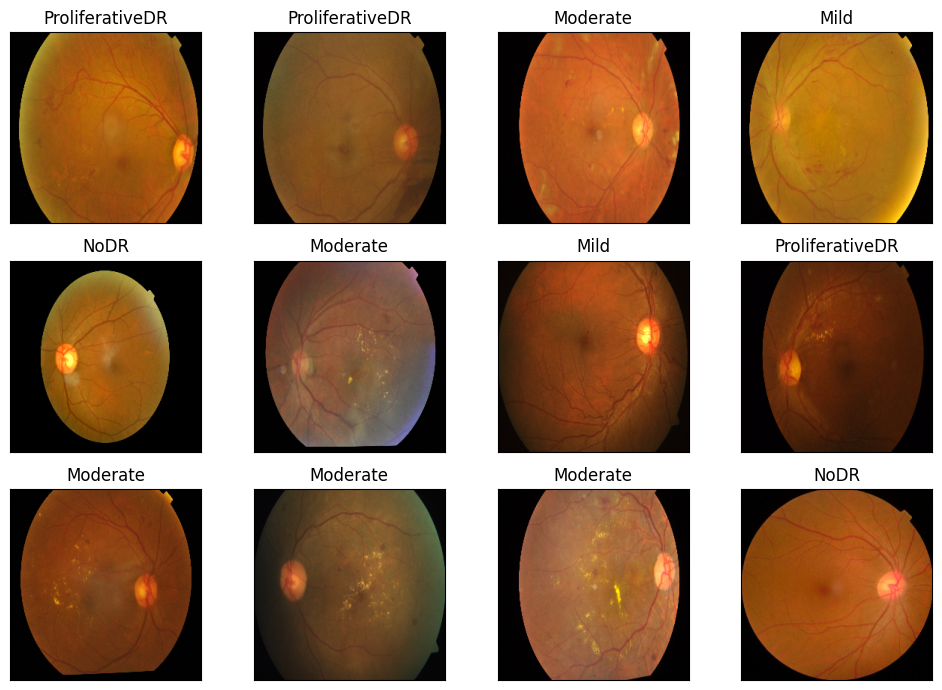

In [22]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

<ipython-input-23-3b4135b59e15>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


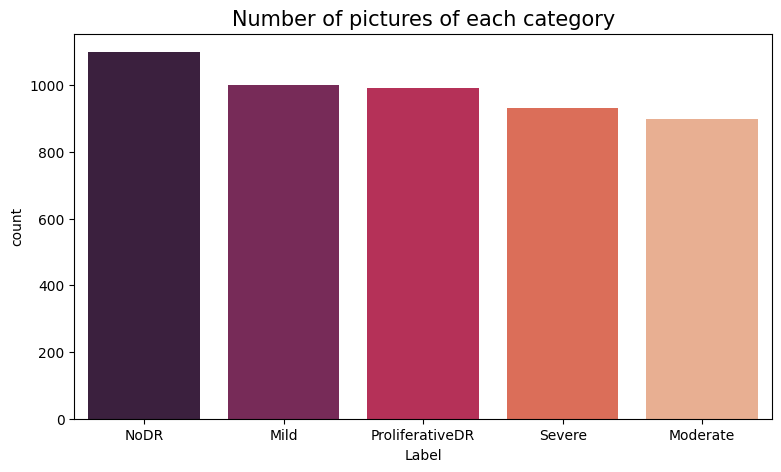

In [23]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [24]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, test_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [25]:
datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest',
                                  preprocessing_function=preprocess_input,
                                  validation_split=0.2)

val_datagen = ImageDataGenerator(rescale=1./255,
                             preprocessing_function=preprocess_input)

train_data = datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=10,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

valid_data = datagen.flow_from_dataframe(dataframe=train_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=10,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='validation',
                                         )
test_data = val_datagen.flow_from_dataframe(dataframe=test_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         target_size=(224,224),
                                         batch_size=10,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 3148 validated image filenames belonging to 5 classes.
Found 786 validated image filenames belonging to 5 classes.
Found 984 validated image filenames belonging to 5 classes.


# Efficient Net B7

In [26]:
!pip install -q efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.2 MB/s eta 0:00:00


In [27]:
import efficientnet.tfkeras as ef

In [28]:
class reduceOverfitting(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.93 and logs.get('val_acc') > 0.93):
      print("\nStopped! Train and Validation Accuracy has already reached 93%")
      self.model.stop_training = True
stop = reduceOverfitting()

In [ ]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
model = ef.EfficientNetB7(weights = 'imagenet',
                          include_top = False,
                          input_shape = (224, 224, 3),
                          pooling='avg')

inputs = model.input


x = Dense(64, activation='relu')(model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['acc'])

258434480/258434480 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [30]:
import tensorflow as tf

def check_gpu_memory():
    # List all GPUs available to TensorFlow
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        for gpu in gpus:
            print(f"Device: {gpu.name}")
            # Get memory info for the GPU
            try:
                details = tf.config.experimental.get_memory_info('GPU:0')  # Replace 'GPU:0' for other devices if needed
                print(f"  - Current memory: {details['current']} bytes")
                print(f"  - Peak memory: {details['peak']} bytes")
            except RuntimeError as e:
                print(f"Could not retrieve memory info: {e}")
    else:
        print("No GPU detected.")

check_gpu_memory()

Device: /physical_device:GPU:0
  - Current memory: 274119168 bytes
  - Peak memory: 288379136 bytes


In [ ]:

history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=30,
    callbacks=[stop],
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


315/315 ━━━━━━━━━━━━━━━━━━━━ 584s 934ms/step - acc: 0.3958 - loss: 1.3852 - val_acc: 0.6298 - val_loss: 0.9451
Epoch 2/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 188s 430ms/step - acc: 0.6773 - loss: 0.8342 - val_acc: 0.8079 - val_loss: 0.5177
Epoch 3/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 128s 402ms/step - acc: 0.7654 - loss: 0.6290 - val_acc: 0.8295 - val_loss: 0.4493
Epoch 4/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 147s 420ms/step - acc: 0.7885 - loss: 0.5380 - val_acc: 0.8753 - val_loss: 0.3808
Epoch 5/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 139s 410ms/step - acc: 0.8395 - loss: 0.4099 - val_acc: 0.8919 - val_loss: 0.3702
Epoch 6/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 150s 433ms/step - acc: 0.8756 - loss: 0.3288 - val_acc: 0.9148 - val_loss: 0.2486
Epoch 7/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 142s 434ms/step - acc: 0.9008 - loss: 0.2694 - val_acc: 0.9211 - val_loss: 0.2371
Epoch 8/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 130s 411ms/step - acc: 0.8956 - loss: 0.2798 - val_acc: 0.9211 - val_loss: 0.2596
Epoch 9/30
315/315 ━━━━━━━━━━━━━━━━

# Plotting Model

In [32]:
import matplotlib.pyplot as plt

In [44]:
def display_training_curves(training, validation, title, subplot):
    # Set up subplots on the first call (if subplot is in the first row)
    if subplot % 10 == 1:  # First call to subplot
        plt.figure(figsize=(10, 10), facecolor='#F0F0F0')  # Create a new figure
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')  # Set background color for the plot area
    ax.plot(training, label='Train')
    ax.plot(validation, label='Validation')
    ax.set_title(f'Model {title}')  # Title with dynamic model name
    ax.set_ylabel(title)  # Label the y-axis with the metric name (loss/accuracy)
    ax.set_xlabel('Epoch')  # Label the x-axis
    ax.legend()  # Add a legend to differentiate between training and validation curves
    ax.grid(True)  # Optionally, add a grid for better readability

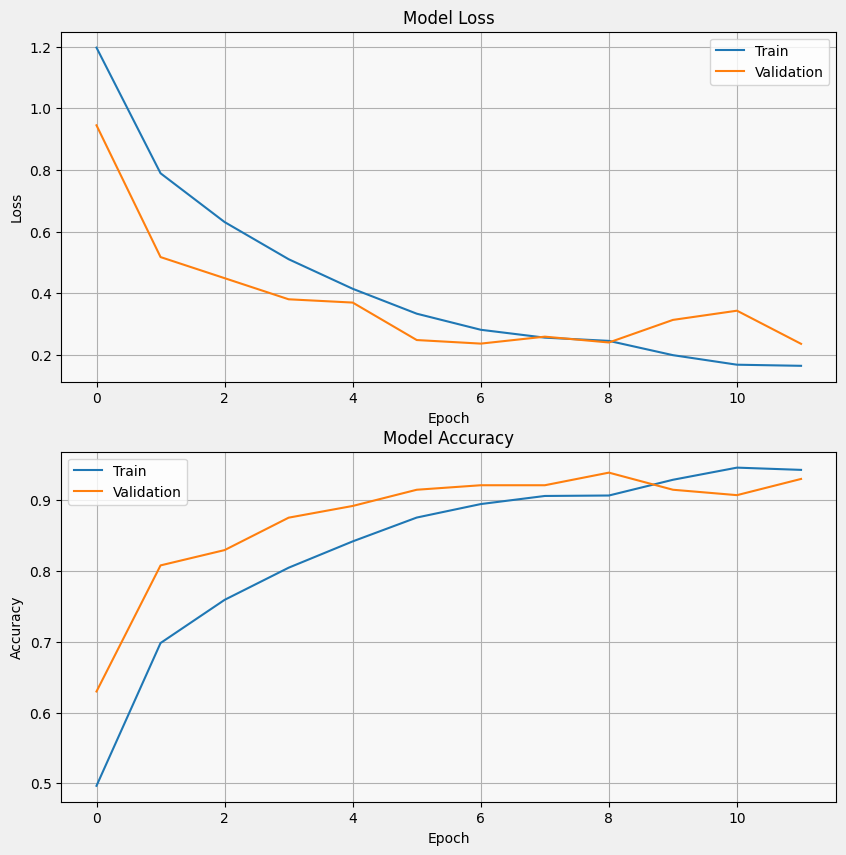

In [45]:
# Display loss curve in the first subplot (211)
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'Loss', 211
)

# Display accuracy curve in the second subplot (212)
display_training_curves(
    history.history['acc'],  # Use 'accuracy' for newer versions of Keras
    history.history['val_acc'],  # Use 'val_accuracy' for newer versions of Keras
    'Accuracy', 212
)

# Evaluation & Prediction

In [46]:
# Predict the label of the test_images
pred = model.predict(test_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step
The first 5 predictions: ['Mild', 'Severe', 'ProliferativeDR', 'Severe', 'NoDR']


In [47]:
from sklearn.metrics import classification_report
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

           Mild       0.84      0.96      0.90       214
       Moderate       0.92      0.68      0.78       160
           NoDR       0.99      0.97      0.98       238
ProliferativeDR       0.95      0.99      0.97       194
         Severe       0.95      0.99      0.97       178

       accuracy                           0.93       984
      macro avg       0.93      0.92      0.92       984
   weighted avg       0.93      0.93      0.93       984



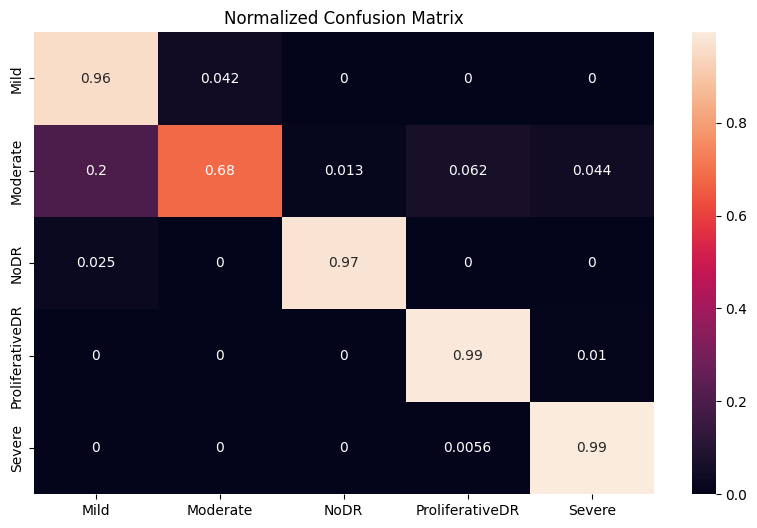

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Test Accuracy = 0.93


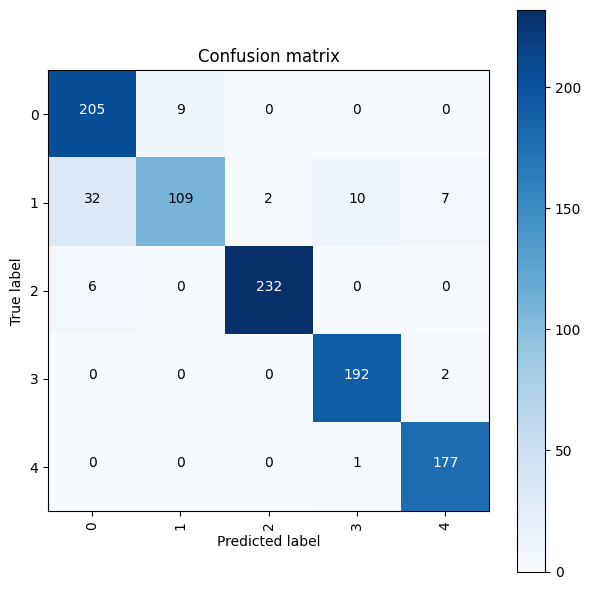

In [51]:
import itertools
from itertools import chain
from sklearn.metrics import accuracy_score, confusion_matrix

for x_model in [{'name':'EfficientNetB7','history':history,'model':model},]:
    # validate on val set
    accuracy = accuracy_score(y_test, pred)
    print('Test Accuracy = %.2f' % accuracy)

    confusion_mtx = confusion_matrix(y_test, pred)
    cm = plot_confusion_matrix(confusion_mtx, classes = labels, normalize=False)

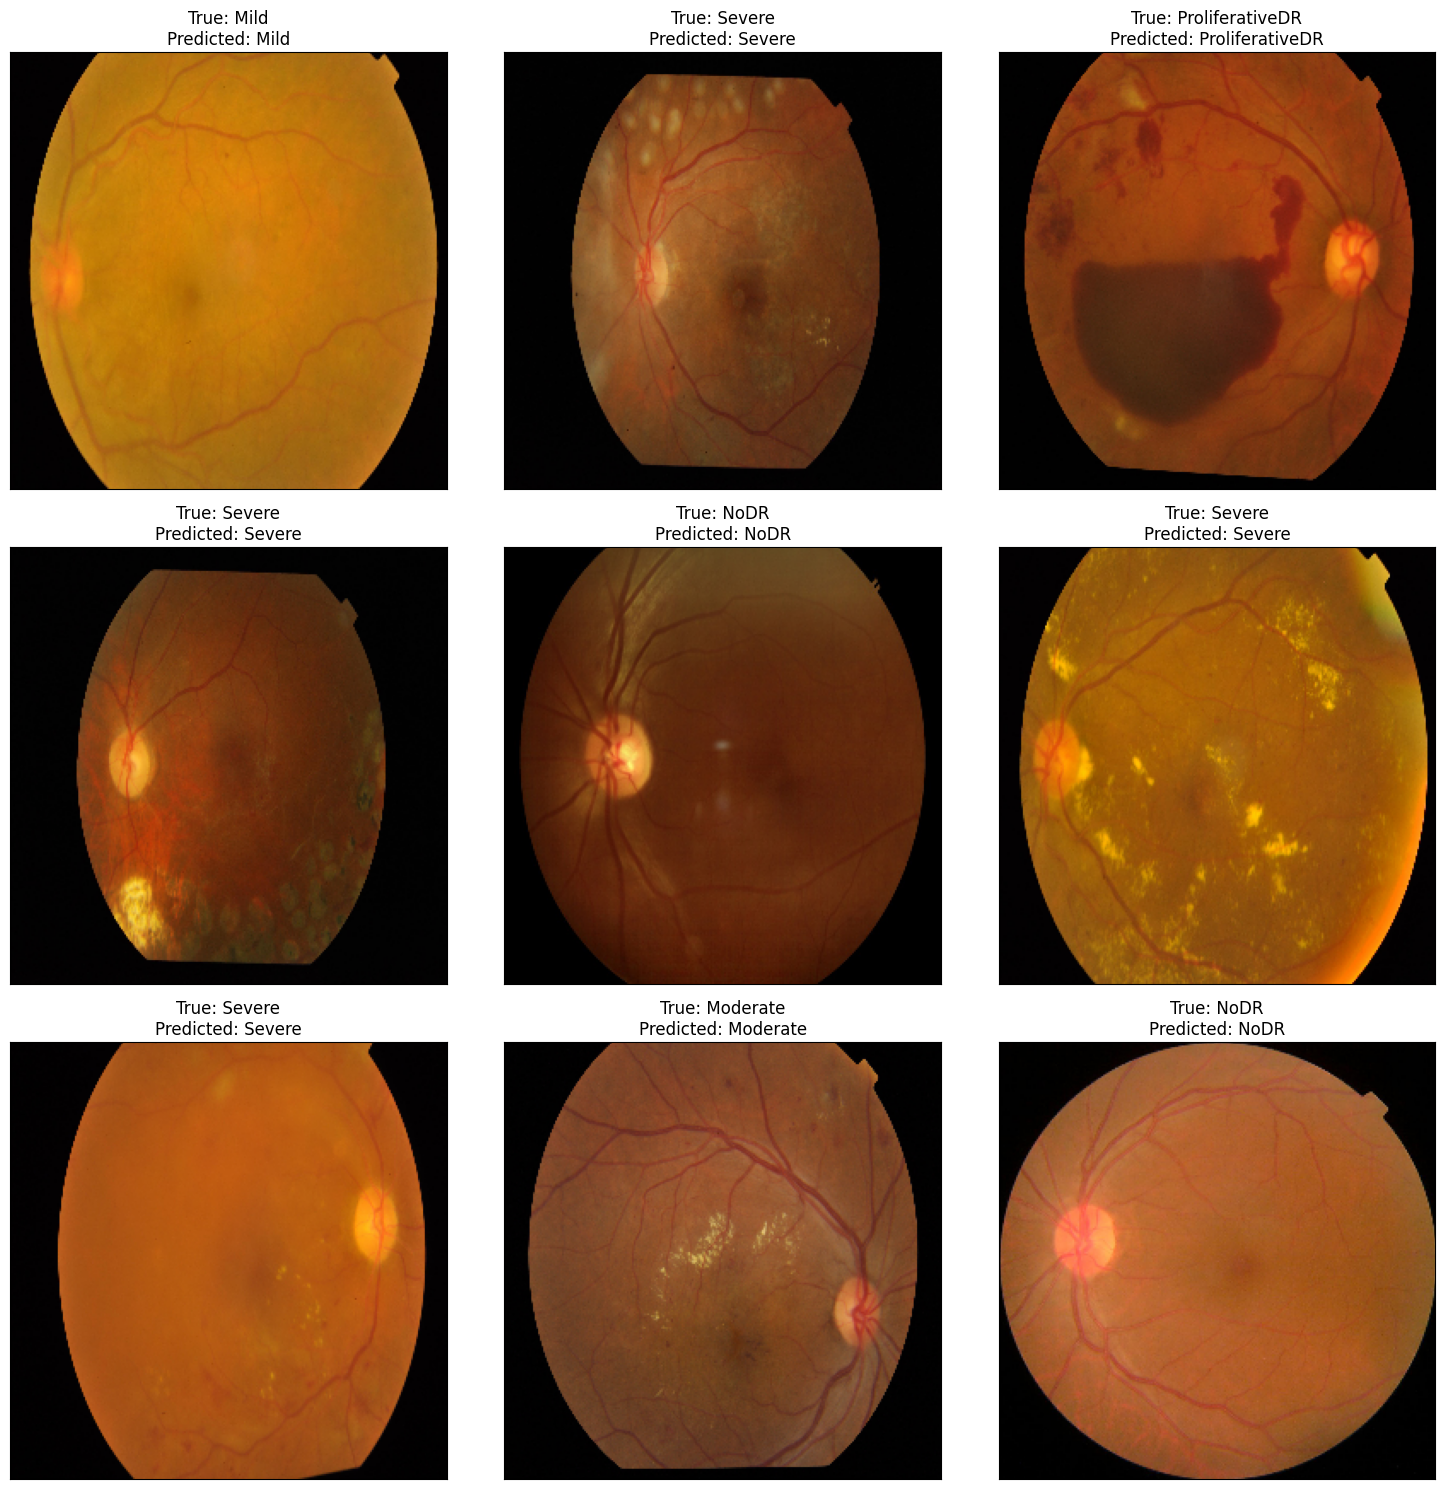

In [52]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
model.save('efficientnetb7.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('efficientnetb7.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>